### This code follows this tutorial on Kaggle: 
http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/

In [1]:
import pandas as pd

In [2]:
from sklearn import tree
import pydotplus
from IPython.display import Image

We have 9 training examples, 3 features and labels, which are the ages of people.

In [3]:
data = [
    # Age, LikesGardening, PlaysVideoGames, LikesHats
    [13, False, True, True], 
    [14, False, True, False],
    [15, False, True, False],
    [25, True, True, True],
    [35, False, True, True],
    [49, True, False, False],
    [68, True, True, True],
    [71, True, False, False],
    [73, True, False, True]
]

# put the data into Pandas data frame
df = pd.DataFrame(data, columns=['Age', 'LikesGardening', 'PlaysVideoGames', 'LikesHats'])
labels = df.Age
training_data = df[['LikesGardening', 'PlaysVideoGames', 'LikesHats']]
training_data

,LikesGardening,PlaysVideoGames,LikesHats
0,False,True,True
1,False,True,False
2,False,True,False
3,True,True,True
4,False,True,True
5,True,False,False
6,True,True,True
7,True,False,False
8,True,False,True


## Tree Classifier

We have a regression problem, but what I did by mistake is fit a decision tree classifier to the data.

Let's see the outcome

In [4]:
def tree_plot(clf):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                 feature_names=list(training_data.columns), 
    #                              class_names are only relevant for classification   
    #                              class_names=list(labels),  
                                 filled=True, rounded=True,
    #                                max_depth=2
                                   )

    graph = pydotplus.graph_from_dot_data(dot_data)  
    return graph 

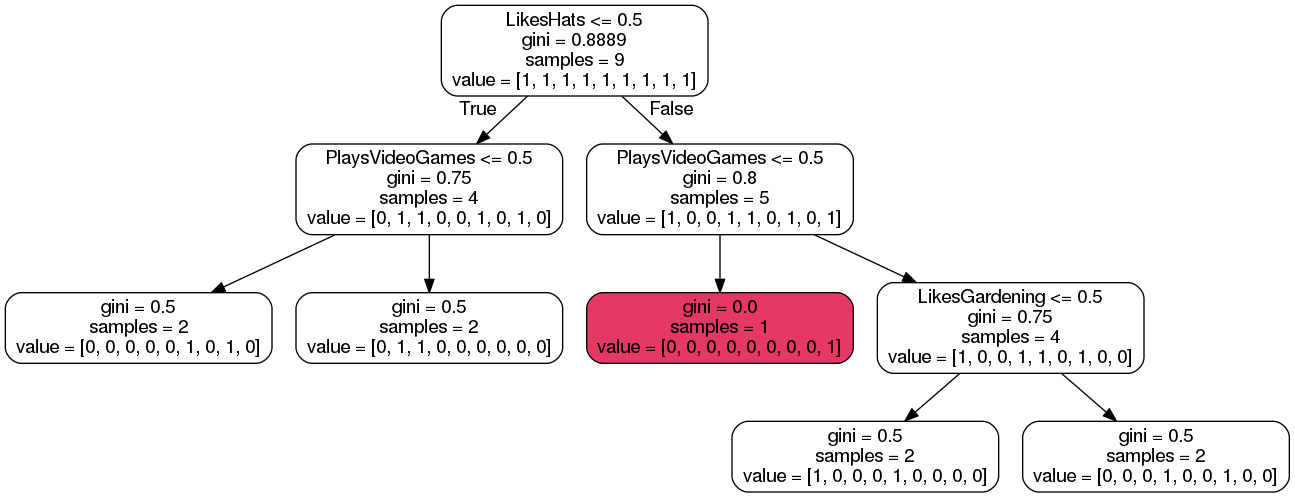

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_data, labels)
Image(tree_plot(clf).create_png())

Gini Index: measures statistical dispertion. it is often used to measure inequality of values in a distribution.

A gini coefficient of 0.0 indicates perfect equality. What does this mean? It means that when we have a node of the tree with gini == 0.0 then all the training examples, which belong to this leaf of the tree, have the same label.

Yeah, in the example tree above, we have only 1 leaf with gini == 0.0 as this leaf is the only leaf with only 1 training example (thus ensuring all labels are equal).

We do not have another leaf with gini == 0.0 as we work with a regression problem, in which we have unique labels. Therefore for all leaves with more than 1 training example we have at least 2 different labels, which does not allow for equality to happen.

## Gradient Boosting #1

- initialize the model with the original labels

Now let's try with a regressor

## Regressor Tree learning

### Tree 1

### 1. 

contraints:
- leaves have more than 3 examples
- use mean squared error as optimization objective

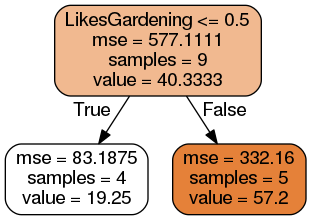

In [6]:
clf = tree.DecisionTreeRegressor(
    # criterion - mse == Mean Squared Error; if you want the absolute error, use mae == Mean Absolute Error
    criterion='mse',
    # the minimum number of examples each leaf must have
    min_samples_leaf=4)

clf = clf.fit(training_data, labels)
# visualize decition tree
Image(tree_plot(clf).create_png())

The 'value' given in each leaf of the tree is the mean of all ages for the examples part of this leaf.

The root, the top one, has a value of 40.3333, which is the mean of all 9 ages given in the training data.

Likewise, the value 19.25 of the left leaf is the mean of all ages for people, whoc like to garden in the training data.

### 2. 

contraints:
- leaves have more than 1 example
- use mean squared error as optimization objective

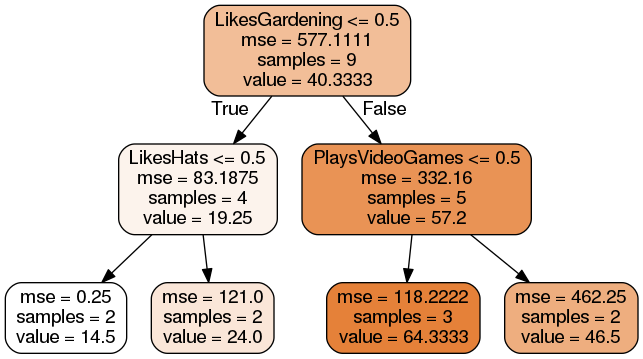

In [7]:
clf = tree.DecisionTreeRegressor(
    # criterion - mse == Mean Squared Error; if you want the absolute error, use mae == Mean Absolute Error
    criterion='mse',
    # the minimum number of examples each leaf must have
    min_samples_leaf=2)

clf = clf.fit(training_data, labels)
# visualize decition tree
Image(tree_plot(clf).create_png())

That looks more informative, does it not?

Unfortunately, here we are already overfitting, as after we se what happens with the feature 'LikesGardening', we catch some information from both 'LikesHats' and 'PlaysVideoGames'.

Let's revert back to the previous tree:

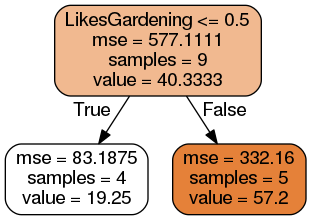

In [8]:
clf = tree.DecisionTreeRegressor(
    # criterion - mse == Mean Squared Error; if you want the absolute error, use mae == Mean Absolute Error
    criterion='mse',
    # the minimum number of examples each leaf must have
    min_samples_leaf=4)

clf = clf.fit(training_data, labels)
# visualize decition tree
Image(tree_plot(clf).create_png())

### 1.2 Calculate Residuals

residual = difference between label and tree prediction

In [9]:
cols = [
    'Age',
    'Tree 1 Prediction',
    'Residuals 1',
    'Tree 2 Prediction',
    'Combined Prediction 1+2',
    'Residuals 2',
    'Tree 3 Prediction',
    'Combined Prediction 1+2+3',
    'Residuals 3'
       ]

results = pd.DataFrame(index = [i for i in range(9)], columns=cols)
results.Age = df.Age

In [10]:
# calculate tree prediction
for i in range(training_data.shape[0]):
    results['Tree 1 Prediction'][i] = clf.predict(training_data.iloc[i])[0]
    # calculate residual for this example's prediction
    results['Residuals 1'][i] = results['Age'][i] - results['Tree 1 Prediction'][i]

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/katia/.

In [11]:
# view regression tree prediction and residuals in table
results

,Age,Tree 1 Prediction,Residuals 1,Tree 2 Prediction,Combined Prediction 1+2,Residuals 2,Tree 3 Prediction,Combined Prediction 1+2+3,Residuals 3
0,13,19.25,-6.25,NaN,NaN,NaN,NaN,NaN,NaN
1,14,19.25,-5.25,NaN,NaN,NaN,NaN,NaN,NaN
2,15,19.25,-4.25,NaN,NaN,NaN,NaN,NaN,NaN
3,25,57.2,-32.2,NaN,NaN,NaN,NaN,NaN,NaN
4,35,19.25,15.75,NaN,NaN,NaN,NaN,NaN,NaN
5,49,57.2,-8.2,NaN,NaN,NaN,NaN,NaN,NaN
6,68,57.2,10.8,NaN,NaN,NaN,NaN,NaN,NaN
7,71,57.2,13.8,NaN,NaN,NaN,NaN,NaN,NaN
8,73,57.2,15.8,NaN,NaN,NaN,NaN,NaN,NaN


Now we want to fit another tree to the training data, but using the residuals from the previous step as the new labels

### Tree 2

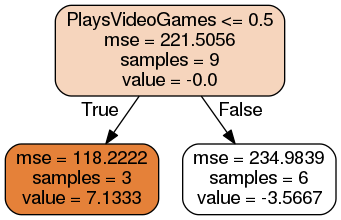

In [12]:
clf = tree.DecisionTreeRegressor(
    # criterion - mse == Mean Squared Error; if you want the absolute error, use mae == Mean Absolute Error
    criterion='mse',
    # the minimum number of examples each leaf must have
    min_samples_leaf=3
)

clf = clf.fit(training_data, results['Residuals 1'])
# visualize decition tree
Image(tree_plot(clf).create_png())

In [13]:
# calculate tree prediction
for i in range(training_data.shape[0]):
    results['Tree 2 Prediction'][i] = clf.predict(training_data.iloc[i])[0]
    # calculate residual for this example's prediction
    results['Combined Prediction 1+2'][i] = results['Tree 1 Prediction'][i] + results['Tree 2 Prediction'][i]
    results['Residuals 2'][i] = results['Age'][i] - results['Combined Prediction 1+2'][i]

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/katia/.

In [14]:
results

,Age,Tree 1 Prediction,Residuals 1,Tree 2 Prediction,Combined Prediction 1+2,Residuals 2,Tree 3 Prediction,Combined Prediction 1+2+3,Residuals 3
0,13,19.25,-6.25,-3.56667,15.6833,-2.68333,NaN,NaN,NaN
1,14,19.25,-5.25,-3.56667,15.6833,-1.68333,NaN,NaN,NaN
2,15,19.25,-4.25,-3.56667,15.6833,-0.683333,NaN,NaN,NaN
3,25,57.2,-32.2,-3.56667,53.6333,-28.6333,NaN,NaN,NaN
4,35,19.25,15.75,-3.56667,15.6833,19.3167,NaN,NaN,NaN
5,49,57.2,-8.2,7.13333,64.3333,-15.3333,NaN,NaN,NaN
6,68,57.2,10.8,-3.56667,53.6333,14.3667,NaN,NaN,NaN
7,71,57.2,13.8,7.13333,64.3333,6.66667,NaN,NaN,NaN
8,73,57.2,15.8,7.13333,64.3333,8.66667,NaN,NaN,NaN


Now 'Residuals 2 show us how far the label prediction after fitting two trees is from the original label, the Age.

let's fit one final tree to continue observing the gradual decrease of the prediction-label difference.

### Tree 3

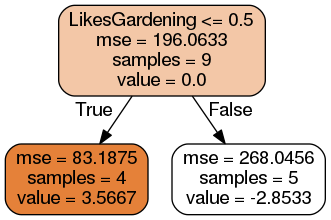

In [15]:
clf = tree.DecisionTreeRegressor(
    # criterion - mse == Mean Squared Error; if you want the absolute error, use mae == Mean Absolute Error
    criterion='mse',
    # the minimum number of examples each leaf must have
    min_samples_leaf=3
)

clf = clf.fit(training_data, results['Residuals 2'])
# visualize decition tree
Image(tree_plot(clf).create_png())

In [16]:
# calculate tree prediction
for i in range(training_data.shape[0]):
    results['Tree 3 Prediction'][i] = clf.predict(training_data.iloc[i])[0]
    # calculate residual for this example's prediction
    results['Combined Prediction 1+2+3'][i] = results['Combined Prediction 1+2'][i] + results['Tree 3 Prediction'][i]
    results['Residuals 3'][i] = results['Age'][i] - results['Combined Prediction 1+2+3'][i]

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/katia/.

In [17]:
results

,Age,Tree 1 Prediction,Residuals 1,Tree 2 Prediction,Combined Prediction 1+2,Residuals 2,Tree 3 Prediction,Combined Prediction 1+2+3,Residuals 3
0,13,19.25,-6.25,-3.56667,15.6833,-2.68333,3.56667,19.25,-6.25
1,14,19.25,-5.25,-3.56667,15.6833,-1.68333,3.56667,19.25,-5.25
2,15,19.25,-4.25,-3.56667,15.6833,-0.683333,3.56667,19.25,-4.25
3,25,57.2,-32.2,-3.56667,53.6333,-28.6333,-2.85333,50.78,-25.78
4,35,19.25,15.75,-3.56667,15.6833,19.3167,3.56667,19.25,15.75
5,49,57.2,-8.2,7.13333,64.3333,-15.3333,-2.85333,61.48,-12.48
6,68,57.2,10.8,-3.56667,53.6333,14.3667,-2.85333,50.78,17.22
7,71,57.2,13.8,7.13333,64.3333,6.66667,-2.85333,61.48,9.52
8,73,57.2,15.8,7.13333,64.3333,8.66667,-2.85333,61.48,11.52


As you can see the values in 'Residuals 3' have decreased in comparison to 'Residuals 2'.

We can contine doing this until we reach comditions which are satisfying.

### Gradient Boosting #1 in a nutshell:

for every new regresion tree fitted:
- use residuals from the previous iteration as labels (use actual labels as labels during first tree learning)
- calculate the combined prediction of all trees (after the second tree learning):
    - sum the previous combined prediction with the new tree prediction
- calculate the new residuals:
    - substract the new combined prediction from the original labels

## Gradient Boosting #2

- initialize the model with the mean(for MSE) and medium(for MAE)

In [63]:
mse = []

cols = [
    'Age',
    'F0',
    'res0',
    'h0',
    'F1',
    'res1', 
    'h1',
    'F2',
    'res2',
    'h2',
    'F2',
    'res3'
       ]

results = pd.DataFrame(index = [i for i in range(9)], columns=cols)
results.Age = df.Age

# initialize with the mean as we want to minimize the MSE = Mean Square Error
results['F0'] = results.Age.mean()
results['res0'] = results.Age - results['F0']


In [64]:
results

,Age,F0,res0,h0,F1,res1,h1,F2,res2,h2,F2,res3
0,13,40.333333,-27.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,40.333333,-26.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,40.333333,-25.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25,40.333333,-15.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35,40.333333,-5.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,49,40.333333,8.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,68,40.333333,27.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,71,40.333333,30.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,73,40.333333,32.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Fit the first tree
- calculate residuals

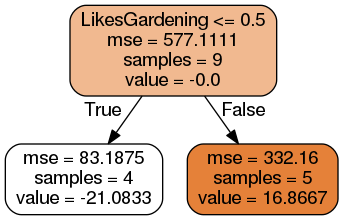

In [72]:
clf = tree.DecisionTreeRegressor(
    # criterion - mse == Mean Squared Error; if you want the absolute error, use mae == Mean Absolute Error
    criterion='mse',
    # the minimum number of examples each leaf must have
    min_samples_leaf=3)

clf = clf.fit(training_data, results['res0'])
# visualize decition tree
Image(tree_plot(clf).create_png())

In [80]:
# calculate residuals
# calculate tree prediction
for i in range(training_data.shape[0]):
    print(results['h0'][i], clf.predict(training_data.iloc[i])[0])
    results['h0'][i] = clf.predict(training_data.iloc[i])[0]
    # calculate residual for this example's prediction
    results['F1'][i] = results['F0'][i] - results['h0'][i]

nan -21.0833333333
nan -21.0833333333
nan -21.0833333333
nan 16.8666666667
nan -21.0833333333
nan 16.8666666667
nan 16.8666666667
nan 16.8666666667
nan 16.8666666667


/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resh

In [81]:
results

,Age,F0,res0,h0,F1,res1,h1,F2,res2,h2,F2,res3
0,13,40.333333,-27.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,40.333333,-26.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,40.333333,-25.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25,40.333333,-15.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35,40.333333,-5.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,49,40.333333,8.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,68,40.333333,27.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,71,40.333333,30.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,73,40.333333,32.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


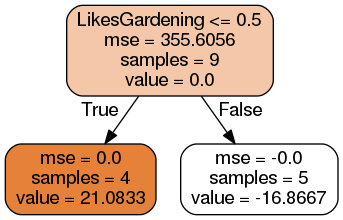

In [51]:
clf = tree.DecisionTreeRegressor(
    # criterion - mse == Mean Squared Error; if you want the absolute error, use mae == Mean Absolute Error
    criterion='mse',
    # the minimum number of examples each leaf must have
    min_samples_leaf=3)

clf = clf.fit(training_data, results['Residuals 1'])
# visualize decition tree
Image(tree_plot(clf).create_png())

In [52]:
# calculate residuals
# calculate tree prediction
for i in range(training_data.shape[0]):
    results['Tree 2 Prediction'][i] = clf.predict(training_data.iloc[i])[0]
    # calculate residual for this example's prediction
    results['Residuals 2'][i] = results.Initial[i] - results['Tree 2 Prediction'][i]

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/katia/.virtualenvs/securaxis/lib/py

In [53]:
results

,Age,Initial,Tree 1 Prediction,Residuals 1,Combined Prediction,Tree 2 Prediction,Combined Prediction 1+2,Residuals 2,Tree 3 Prediction,Combined Prediction 1+2+3,Residuals 3
0,13,40.333333,19.25,21.0833,NaN,21.0833,NaN,19.25,NaN,NaN,NaN
1,14,40.333333,19.25,21.0833,NaN,21.0833,NaN,19.25,NaN,NaN,NaN
2,15,40.333333,19.25,21.0833,NaN,21.0833,NaN,19.25,NaN,NaN,NaN
3,25,40.333333,57.2,-16.8667,NaN,-16.8667,NaN,57.2,NaN,NaN,NaN
4,35,40.333333,19.25,21.0833,NaN,21.0833,NaN,19.25,NaN,NaN,NaN
5,49,40.333333,57.2,-16.8667,NaN,-16.8667,NaN,57.2,NaN,NaN,NaN
6,68,40.333333,57.2,-16.8667,NaN,-16.8667,NaN,57.2,NaN,NaN,NaN
7,71,40.333333,57.2,-16.8667,NaN,-16.8667,NaN,57.2,NaN,NaN,NaN
8,73,40.333333,57.2,-16.8667,NaN,-16.8667,NaN,57.2,NaN,NaN,NaN


# TODO: cross-validation for the number of iterations

- a good article about cross-validation: http://robjhyndman.com/hyndsight/crossvalidation/